## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  0.503005  0.660956 -0.285753 -1.169407 -0.491336 -0.117507
1 -0.305310  1.102608 -1.589709  1.664902  0.952917  2.403285
2 -1.080151  1.157661 -0.473551 -1.142497  0.112598 -0.968150
3 -0.603371  0.132313  0.402246  0.935383 -0.745763 -0.074202
4  0.550613 -1.220367  1.507484  1.518786  0.537002  0.956982


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9795658	total: 58.6ms	remaining: 58.5s
1:	learn: 0.9718660	total: 59.1ms	remaining: 29.5s
2:	learn: 0.9634377	total: 59.6ms	remaining: 19.8s
3:	learn: 0.9546769	total: 60.2ms	remaining: 15s
4:	learn: 0.9458310	total: 60.8ms	remaining: 12.1s
5:	learn: 0.9377820	total: 61.5ms	remaining: 10.2s
6:	learn: 0.9289238	total: 62ms	remaining: 8.79s
7:	learn: 0.9201340	total: 62.5ms	remaining: 7.75s
8:	learn: 0.9109645	total: 63.1ms	remaining: 6.95s
9:	learn: 0.9034812	total: 63.6ms	remaining: 6.3s
10:	learn: 0.8947089	total: 64.1ms	remaining: 5.76s
11:	learn: 0.8859081	total: 64.7ms	remaining: 5.32s
12:	learn: 0.8770847	total: 65.1ms	remaining: 4.94s
13:	learn: 0.8674670	total: 65.6ms	remaining: 4.62s
14:	learn: 0.8592665	total: 66ms	remaining: 4.33s
15:	learn: 0.8507453	total: 66.5ms	remaining: 4.09s
16:	learn: 0.8436883	total: 67ms	remaining: 3.87s
17:	learn: 0.8360901	total: 67.4ms	remaining: 3.67s
18:	learn: 0.8281256	total: 67.8ms	remaining: 3.5s
19

102:	learn: 0.4149883	total: 108ms	remaining: 944ms
103:	learn: 0.4121197	total: 109ms	remaining: 938ms
104:	learn: 0.4084447	total: 110ms	remaining: 934ms
105:	learn: 0.4053218	total: 110ms	remaining: 928ms
106:	learn: 0.4018230	total: 110ms	remaining: 922ms
107:	learn: 0.3986841	total: 111ms	remaining: 916ms
108:	learn: 0.3959016	total: 111ms	remaining: 910ms
109:	learn: 0.3926924	total: 112ms	remaining: 904ms
110:	learn: 0.3896273	total: 112ms	remaining: 899ms
111:	learn: 0.3866528	total: 113ms	remaining: 893ms
112:	learn: 0.3836765	total: 113ms	remaining: 887ms
113:	learn: 0.3806737	total: 114ms	remaining: 882ms
114:	learn: 0.3776077	total: 114ms	remaining: 877ms
115:	learn: 0.3746594	total: 114ms	remaining: 872ms
116:	learn: 0.3718721	total: 115ms	remaining: 867ms
117:	learn: 0.3693718	total: 115ms	remaining: 861ms
118:	learn: 0.3660481	total: 116ms	remaining: 856ms
119:	learn: 0.3626381	total: 116ms	remaining: 851ms
120:	learn: 0.3589677	total: 117ms	remaining: 847ms
121:	learn: 

268:	learn: 0.1236141	total: 187ms	remaining: 507ms
269:	learn: 0.1226644	total: 187ms	remaining: 506ms
270:	learn: 0.1217769	total: 188ms	remaining: 505ms
271:	learn: 0.1209891	total: 188ms	remaining: 504ms
272:	learn: 0.1200777	total: 189ms	remaining: 503ms
273:	learn: 0.1193877	total: 189ms	remaining: 502ms
274:	learn: 0.1186244	total: 190ms	remaining: 501ms
275:	learn: 0.1175708	total: 190ms	remaining: 500ms
276:	learn: 0.1168965	total: 191ms	remaining: 499ms
277:	learn: 0.1160941	total: 192ms	remaining: 498ms
278:	learn: 0.1153053	total: 192ms	remaining: 497ms
279:	learn: 0.1147483	total: 193ms	remaining: 495ms
280:	learn: 0.1139582	total: 193ms	remaining: 494ms
281:	learn: 0.1133061	total: 194ms	remaining: 493ms
282:	learn: 0.1122677	total: 194ms	remaining: 492ms
283:	learn: 0.1115976	total: 195ms	remaining: 490ms
284:	learn: 0.1106671	total: 195ms	remaining: 489ms
285:	learn: 0.1099383	total: 195ms	remaining: 488ms
286:	learn: 0.1091803	total: 196ms	remaining: 487ms
287:	learn: 

481:	learn: 0.0362686	total: 291ms	remaining: 313ms
482:	learn: 0.0361094	total: 292ms	remaining: 312ms
483:	learn: 0.0359652	total: 292ms	remaining: 311ms
484:	learn: 0.0358542	total: 293ms	remaining: 311ms
485:	learn: 0.0357006	total: 293ms	remaining: 310ms
486:	learn: 0.0355615	total: 294ms	remaining: 309ms
487:	learn: 0.0354530	total: 294ms	remaining: 309ms
488:	learn: 0.0353169	total: 295ms	remaining: 308ms
489:	learn: 0.0352106	total: 295ms	remaining: 307ms
490:	learn: 0.0350358	total: 296ms	remaining: 306ms
491:	learn: 0.0348751	total: 296ms	remaining: 306ms
492:	learn: 0.0347708	total: 296ms	remaining: 305ms
493:	learn: 0.0346747	total: 297ms	remaining: 304ms
494:	learn: 0.0345721	total: 297ms	remaining: 303ms
495:	learn: 0.0344028	total: 298ms	remaining: 303ms
496:	learn: 0.0342494	total: 298ms	remaining: 302ms
497:	learn: 0.0341161	total: 299ms	remaining: 301ms
498:	learn: 0.0339737	total: 299ms	remaining: 300ms
499:	learn: 0.0338460	total: 300ms	remaining: 300ms
500:	learn: 

642:	learn: 0.0217317	total: 371ms	remaining: 206ms
643:	learn: 0.0216170	total: 371ms	remaining: 205ms
644:	learn: 0.0215220	total: 372ms	remaining: 205ms
645:	learn: 0.0214810	total: 372ms	remaining: 204ms
646:	learn: 0.0213253	total: 372ms	remaining: 203ms
647:	learn: 0.0212951	total: 373ms	remaining: 203ms
648:	learn: 0.0212807	total: 373ms	remaining: 202ms
649:	learn: 0.0212408	total: 374ms	remaining: 201ms
650:	learn: 0.0211320	total: 374ms	remaining: 201ms
651:	learn: 0.0210219	total: 375ms	remaining: 200ms
652:	learn: 0.0209481	total: 375ms	remaining: 199ms
653:	learn: 0.0208881	total: 376ms	remaining: 199ms
654:	learn: 0.0207818	total: 376ms	remaining: 198ms
655:	learn: 0.0206982	total: 377ms	remaining: 198ms
656:	learn: 0.0206262	total: 377ms	remaining: 197ms
657:	learn: 0.0205880	total: 378ms	remaining: 196ms
658:	learn: 0.0204852	total: 378ms	remaining: 196ms
659:	learn: 0.0203902	total: 379ms	remaining: 195ms
660:	learn: 0.0203397	total: 379ms	remaining: 195ms
661:	learn: 

847:	learn: 0.0111620	total: 474ms	remaining: 85ms
848:	learn: 0.0111267	total: 475ms	remaining: 84.5ms
849:	learn: 0.0110871	total: 475ms	remaining: 83.9ms
850:	learn: 0.0110557	total: 476ms	remaining: 83.4ms
851:	learn: 0.0110145	total: 477ms	remaining: 82.8ms
852:	learn: 0.0109856	total: 477ms	remaining: 82.2ms
853:	learn: 0.0109513	total: 478ms	remaining: 81.6ms
854:	learn: 0.0109390	total: 478ms	remaining: 81.1ms
855:	learn: 0.0109270	total: 479ms	remaining: 80.5ms
856:	learn: 0.0108862	total: 479ms	remaining: 80ms
857:	learn: 0.0108582	total: 480ms	remaining: 79.4ms
858:	learn: 0.0108247	total: 480ms	remaining: 78.8ms
859:	learn: 0.0107704	total: 481ms	remaining: 78.3ms
860:	learn: 0.0107294	total: 481ms	remaining: 77.7ms
861:	learn: 0.0106738	total: 482ms	remaining: 77.1ms
862:	learn: 0.0106369	total: 482ms	remaining: 76.6ms
863:	learn: 0.0106230	total: 483ms	remaining: 76ms
864:	learn: 0.0106094	total: 483ms	remaining: 75.4ms
865:	learn: 0.0105734	total: 484ms	remaining: 74.8ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

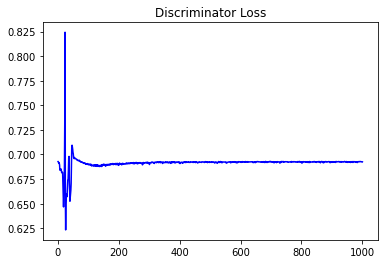

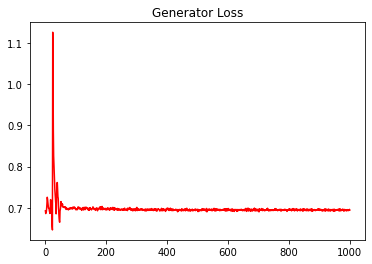

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.11371696301148985


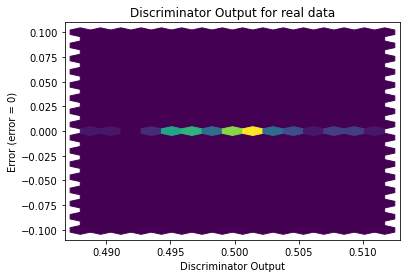

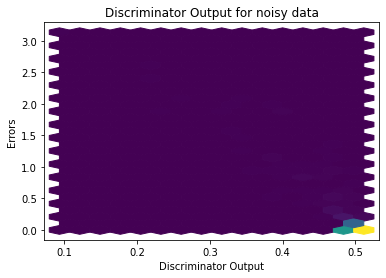

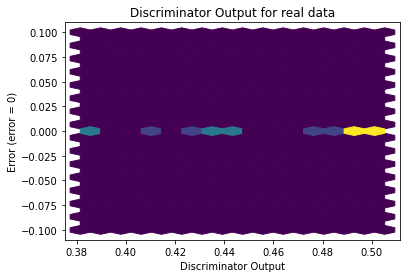

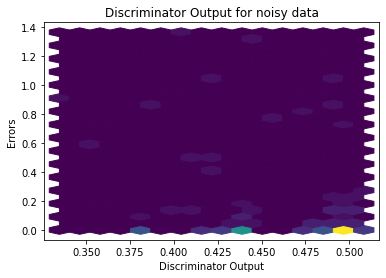

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


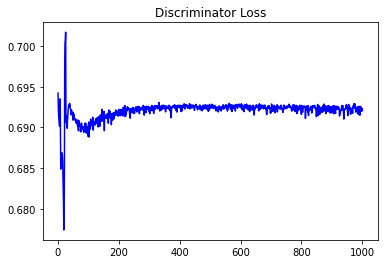

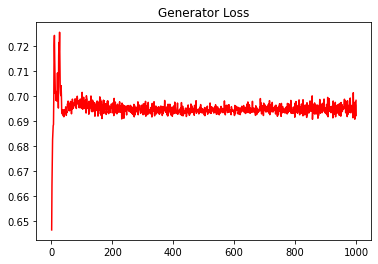

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.0818245057165832


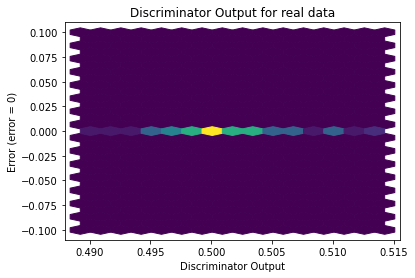

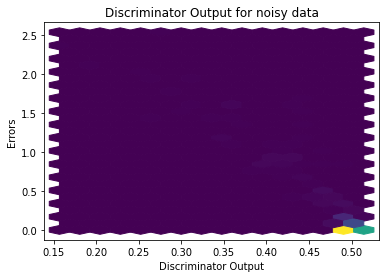

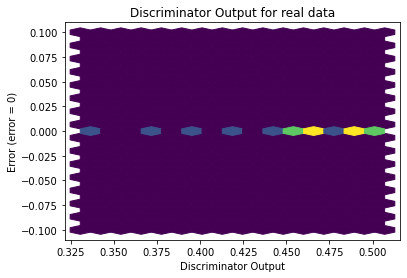

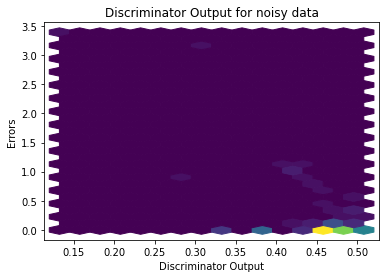

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.8248]], requires_grad=True)
